# Load the librarys

In [220]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
warnings.filterwarnings('ignore')

# Load Data

In [117]:
# Read spreadsheet and assign it to swiss_loan
swiss_loan= pd.read_excel('C:/Users/rzouga/Desktop/ALLINHERE/Assignement/ATUCE_Case_study_data_2021.xlsx')

# Preprocess Pipeline (preprocessing ,cleaning , features eng, features selection)

In [118]:
# Create a boolean mask on whether each feature less than 40% missing values.
mask = swiss_loan.isna().sum() / len(swiss_loan) < 0.4
# Create a reduced dataset by applying the mask
reduced_df =swiss_loan.loc[:, mask]

# drop ID
reduced_df.drop('ID', axis=1, inplace=True)
reduced_df['Pays_corr']=reduced_df['Pays'].str.strip()
reduced_df['Taux_corr']=reduced_df['Taux'].str.replace('%','').str.strip().str.replace(',','.').str.extract(r'(\d+.\d+)')
reduced_df['Taux_corr'] = np.where(reduced_df['Taux_corr'].isnull(), 0.1, reduced_df['Taux_corr'])
reduced_df['Taux_corr'] = pd.to_numeric(reduced_df['Taux_corr'], errors='coerce')
# Specify the boundaries of the bins
bins = [0.001,5.5,  6.5, 10]
# Bin labels
labels = [ 'Low', 'Medium', 'High']
# Bin the continuous variable ConvertedSalary using these boundaries
reduced_df['Taux_corr_binned'] = pd.cut(reduced_df['Taux_corr'], 
                                         bins=bins,labels=labels )
# Print the first 5 rows of the boundary_binned column
reduced_df['Montant_corr']=reduced_df['Montant'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Montant_corr'] = np.where(reduced_df['Montant_corr'].isnull(), 0.1, reduced_df['Montant_corr'])
reduced_df['Montant_corr'] = pd.to_numeric(reduced_df['Montant_corr'], errors='coerce')
reduced_df['Niveau_risque_corr']=reduced_df['Niveau de risque'].str.rstrip().str.replace('\s+','')
Emprunteurs = reduced_df['Emprunteur']


Emprunteurs_counts = Emprunteurs.value_counts()

# Create a mask for only categories that occur less than 5 times
mask = Emprunteurs.isin(Emprunteurs_counts[Emprunteurs_counts<5].index)
# Label all other categories as Other
reduced_df['Emprunteur'][mask] = 'Other'
reduced_df['capital_social_corr']=reduced_df['capital social'].str.replace('€','').str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['capital_social_corr'] = np.where(reduced_df['capital_social_corr'].isnull(), 0.1, reduced_df['capital_social_corr'])
reduced_df['capital_social_corr'] = pd.to_numeric(reduced_df['capital_social_corr'], errors='coerce')

reduced_df['Effectifse_corr']=reduced_df['effectifs'].str.rstrip().str.replace('\s+','')
reduced_df['Effectifse_corr'][reduced_df['Effectifse_corr'] == '-'] = np.nan

reduced_df['Nombre_mois_période16_corr']=reduced_df['Nombre de mois de la période 16'].str.rstrip().str.replace('mois','').str.replace(',','.').str.replace('\s+','').str.extract(r"(\d+\.\d+|\d+)")
reduced_df['Nombre_mois_période16_corr'][reduced_df['Nombre_mois_période16_corr'] == '-'] = np.nan
reduced_df['Nombre_mois_période16_corr'] = pd.to_numeric(reduced_df['Nombre_mois_période16_corr'], errors='coerce')

reduced_df['Chiffre_Affaires_16_corr']=reduced_df.iloc[:,12].str.replace('\xa0','').str.strip().str.replace('\s+','')
reduced_df['Chiffre_Affaires_16_corr'] = pd.to_numeric(reduced_df['Chiffre_Affaires_16_corr'], errors='coerce')

reduced_df['Total_Bilan_16_corr']= reduced_df['Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Total_Bilan_16_corr']= pd.to_numeric(reduced_df['Total_Bilan_16_corr'], errors='coerce')

reduced_df['Capacité_remboursement_FCCR_16_corr']= reduced_df['Capacité de remboursement (FCCR) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Capacité_remboursement_FCCR_16_corr']= pd.to_numeric(reduced_df['Capacité_remboursement_FCCR_16_corr'], errors='coerce')


reduced_df['Fonds_Propres_16_corr']= reduced_df['Fonds Propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_16_corr']= pd.to_numeric(reduced_df['Fonds_Propres_16_corr'], errors='coerce')

reduced_df['Fonds_Propres_Total_Bilan_corr']= reduced_df['Fonds Propres / Total Bilan 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Fonds_Propres_Total_Bilan_corr']= pd.to_numeric(reduced_df['Fonds_Propres_Total_Bilan_corr'], errors='coerce')

reduced_df['Dettes_Nettes_EBE_16_corr']= reduced_df['Dettes Nettes / EBE(* années) 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('*','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['Dettes_Nettes_EBE_16_corr']= pd.to_numeric(reduced_df['Dettes_Nettes_EBE_16_corr'], errors='coerce')

reduced_df['DettesNettes_Fonds_propres_16_corr']= reduced_df['Dettes Nettes / Fonds propres 16'].str.replace('\xa0','').str.strip().str.replace('\s+','').str.replace(',','.').str.replace('%','').str.extract(r"([-+]?\d*\.*\d+|\d+)")
reduced_df['DettesNettes_Fonds_propres_16_corr']= pd.to_numeric(reduced_df['DettesNettes_Fonds_propres_16_corr'], errors='coerce')


# Apply the log normalization function 
reduced_df['Montant_corr_log'] = np.log(reduced_df['Montant_corr'])

# Apply the log normalization function 
reduced_df['Chiffre_Affaires_16_corr_log'] = np.log(reduced_df['Chiffre_Affaires_16_corr'])
# Apply the log normalization function t
reduced_df['capital_social_corr_log'] = np.log(reduced_df['capital_social_corr']+1)
# This function converts given date to age
def age(creation):
    born = int(creation)
    today = date.today()
    return today.year - born
  
reduced_df['Age'] = reduced_df['année de création'].apply(age)

In [119]:
reduced_df.shape

(688, 39)

# Keep Clean Columns

In [120]:
reduced_df.columns

Index(['Pays', 'Taux', 'Mois', 'Montant', 'Niveau de risque', 'Emprunteur',
       'capital social', 'année de création', 'Antériorité', 'effectifs',
       'Nombre de mois de la période 16', 'Chiffre d'Affaires 16',
       'EBE(retraité des loyers de leasing) 16', 'Resultat Net 16',
       'Total Bilan 16', 'Capacité de remboursement (FCCR) 16',
       'Fonds Propres 16', 'Fonds Propres / Total Bilan 16',
       'Dettes Nettes / EBE(* années) 16', 'Dettes Nettes / Fonds propres 16',
       'Pays_corr', 'Taux_corr', 'Taux_corr_binned', 'Montant_corr',
       'Niveau_risque_corr', 'capital_social_corr', 'Effectifse_corr',
       'Nombre_mois_période16_corr', 'Chiffre_Affaires_16_corr',
       'Total_Bilan_16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr',
       'Montant_corr_log', 'Chiffre_Affaires_16_corr_log',
       'capital_social_corr_log', 'Age

In [121]:
list_to_keep= [ 'Pays_corr','Mois','Age' ,'Taux_corr', 'Taux_corr_binned', 'Montant_corr_log',
       'Niveau_risque_corr','Emprunteur', 'capital_social_corr_log', 'Effectifse_corr',
       'Nombre_mois_période16_corr', 'Capacité_remboursement_FCCR_16_corr','Total_Bilan_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr','Chiffre_Affaires_16_corr_log']
clean_reduced_df= reduced_df[list_to_keep].copy()
clean_reduced_df.shape

(688, 18)

# Model 1 : REGRESSION : predict "Taux_corr"
## Extract X and y

In [122]:
# Create arrays for the features and the response variable
colonne_cible = "Taux_corr"

Data_regression =clean_reduced_df.drop(['Taux_corr_binned'], axis=1).copy()
X = Data_regression.drop(['Taux_corr'], axis=1)
y= Data_regression['Taux_corr']
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

69 rows in test set vs. 619 in training set. 16 Features.


# What should we do for each colmun 

In [123]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns


# check that we have all column 

In [124]:
num_columns=['Mois', 'Age', 'Montant_corr_log', 'capital_social_corr_log',
       'Nombre_mois_période16_corr', 'Capacité_remboursement_FCCR_16_corr',
       'Fonds_Propres_16_corr', 'Fonds_Propres_Total_Bilan_corr',
       'Dettes_Nettes_EBE_16_corr', 'DettesNettes_Fonds_propres_16_corr',
       'Chiffre_Affaires_16_corr_log']
cat_columns=['Pays_corr', 'Niveau_risque_corr', 'Emprunteur',
       'Effectifse_corr']
all_columns = (num_columns
               +cat_columns)

if set(all_columns) == set(X1.columns):
    print('Ok')
else:
    # Alors je veux voir les différences
    print('dans all_columns mais pas dans X1.columns   :', set(all_columns) - set(X1.columns))
    print('dans X.columns   mais pas dans all_columns :', set(X1.columns) - set(all_columns))

Ok


In [125]:
"==>i have just create Taux_corr_binned in  order to do a classifcation task "

'==>i have just create Taux_corr_binned in  order to do a classifcation task '

# Create complexe transformer  in order to  put all transformations in the same pipe 
In our case :

    'num_columns' :Cleaning->Valeur Manquante -> Standar_Scaler
    'cat_columns' : Cleaning -> Valeur Manquante -> Categorique [One Hot]
**==> Cleaning is done by pandas , in the future this step sould be intergeted the pipe using "custumer Function" like this Example:**

    fill_missing_then_Standar_scaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
        StandardScaler()
    )

    "Write a pattern to extract numbers and decimals"
    def return_number(string):
        pattern = re.compile(r"\d+\.\d+")
        # Search the text for matches
        number = re.match(pattern, string)
        # If a value is returned, use group(0) to return the found value
        if number is not None:
            return float(number.group(0))

    extraire_number_then_imput_then_scale = make_pipeline(
        FunctionTransformer(extract_number),
        fill_missing_then_Standar_scaler,
    )    


# Pipe Cat columns : 


In [126]:
fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)

# Pipe Numeric Columns : 

In [127]:
 fill_missing_then_StandardScaler = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)

# Compose num+cat : ColumnTransformer

In [128]:
data_preprocess = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns)
)


## Check 

In [129]:
data_preprocess.fit(X)
data_preprocess.transform(X)
data_preprocess.transform(X_test)

print("Ok , Every thing is well ")

Ok , Every thing is well 


# Find Best Pipe
## Step 1: Cross-Validation

In [130]:
cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)

cross_validation_design

KFold(n_splits=5, random_state=77, shuffle=True)

### KNN pipe

In [151]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# params = {'n_neighbors':[2,3,4,5,6,7,8,9]}


KNN_MODEL = {}

# Définir la pipeline
KNN_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('knn', KNN())
                                  ])

# Définir la grille
KNN_MODEL['hyperparams'] = {}
KNN_MODEL['hyperparams']['knn__n_neighbors'] = [1, 3,5,8, 9,10,11,15, 20,21, 51]
KNN_MODEL['hyperparams']['knn__weights'] = ['uniform','distance']
KNN_MODEL['hyperparams']['knn__metric'] = ['euclidean', 'manhattan', 'minkowski']

# Effectuer la GridSearch
KNN_MODEL['gridsearch'] = GridSearchCV(
    estimator=KNN_MODEL['pipeline'],
    param_grid=KNN_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='r2'
    )

KNN_MODEL['gridsearch'].fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('data_process',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        fill_value='manquante',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                 

In [152]:
KNN_MODEL['gridsearch'].best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 51,
 'knn__weights': 'distance'}

In [153]:
KNN_MODEL['gridsearch'].best_score_

0.07611574307552002

### LR pipe

In [154]:
from sklearn.linear_model import LinearRegression

# Définir la pipeline
REGRESSION_MODEL = {}
REGRESSION_MODEL['pipeline'] = Pipeline([
                                        ('data_cleaning', data_preprocess ),
                                        ('reg', LinearRegression())
])

# Définir la grille
REGRESSION_MODEL['hyperparams'] = {}
#REGRESSION_MODEL['hyperparams']['reg__alpha'] = np.arange(.1, 10., .1)

# Faire la recherche
REGRESSION_MODEL['gridsearch'] = GridSearchCV(
                                      estimator=REGRESSION_MODEL['pipeline'],
                                      param_grid=REGRESSION_MODEL['hyperparams'],
                                      cv=cross_validation_design,
                                      scoring='r2'
                                      )

REGRESSION_MODEL['gridsearch'].fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('data_cleaning',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        fill_value='manquante',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                

#### you can obtain the coefficient of determination (𝑅²) with .score() called on model

In [155]:
model = REGRESSION_MODEL['gridsearch'].fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.11939354183583073


In [ ]:
y_pred = model.predict(X_test)
df_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_LR.tail()

In [156]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.011946114911504
Mean Squared Error: 31.908159717606434
Root Mean Squared Error: 5.648730805907326


In [157]:
REGRESSION_MODEL['gridsearch'].best_score_

-18.733354517544875

In [265]:
# instantiate linear regression object
ridge = RidgeCV()
ridge_MODEL = Pipeline([
                                        ('data_cleaning', data_preprocess ),
                                        ('reg', ridge)
])
# fit or train the linear regression model on the training set and store parameters
ridge_MODEL.fit(X_train, y_train)

r_sq = ridge_MODEL.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.11830695095531307


In [266]:
# use trained RidgeCV regression model to predict interest rates of training and test data

y_pred = ridge_MODEL.predict(X_test)
df_Ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
df_Ridge.head()

RMSE on training data:  2.827170972169815


,Actual,Predicted
439,5.35,4.850579
90,5.50,4.085489
315,7.25,4.909013
5,6.75,5.296130
678,7.50,4.049366


# SVR pipe 

In [188]:
from sklearn.svm import SVR
regressor = SVR()
SVR_MODEL = {}

# Définir la pipeline
SVR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('SVR', regressor)
                                  ])

# Définir la grille
SVR_MODEL['hyperparams'] = {}
SVR_MODEL['hyperparams']['SVR__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVR_MODEL['hyperparams']['SVR__degree'] = [0,1,2, 3, 4,5,6,7,8,9]
SVR_MODEL['hyperparams']['SVR__gamma'] = ['scale', 'auto',1, 0.1, 0.01, 0.001, 0.0001]
SVR_MODEL['hyperparams']['SVR__C'] = [50, 10, 1.0, 0.1, 0.01,100]

# Effectuer la GridSearch
SVR_MODEL['gridsearch'] = GridSearchCV(
    estimator=SVR_MODEL['pipeline'],
    param_grid=SVR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='r2'
    )

#Define SVR classifier
SVR_MODEL['gridsearch'].fit(X_train, y_train)
svr_accuracy = SVR_MODEL['gridsearch'].score(X_test, y_test)

print('Support Vector Classifier Accuracy : ', svr_accuracy)

Support Vector Classifier Accuracy :  -0.14699522888219851


In [163]:
regressor.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [189]:
SVR_MODEL['gridsearch'].best_params_

{'SVR__C': 10, 'SVR__degree': 0, 'SVR__gamma': 1, 'SVR__kernel': 'rbf'}

In [ ]:
"""{'SVR__C': 10, 'SVR__degree': 0, 'SVR__gamma': 1, 'SVR__kernel': 'rbf'}"""

##  XGBOOST Regressor  pipe :


In [195]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR_MODEL = {}
# Définir la pipeline
XGBR_MODEL['pipeline'] = Pipeline([
                                  ('data_process', data_preprocess),
                                  ('XGBR', XGBR)
                                  ])

# Définir la grille
XGBR_MODEL['hyperparams'] = {}
#XGBR_MODEL['hyperparams']['XGBR__n_estimators'] = [10,20]
#XGBR_MODEL['hyperparams']['XGBR__colsample_bytree'] = [0.7, 0.8]
#XGBR_MODEL['hyperparams']['XGBR__max_depth'] = [5,7,15]
#XGBR_MODEL['hyperparams']['XGBR__reg_alpha'] = [1.1, 1.2 ]
#XGBR_MODEL['hyperparams']['XGBR__reg_lambda'] = [1.1, 1.2, 1.3]
#XGBR_MODEL['hyperparams']['XGBR__subsample'] = [0.7, 0.8, 0.9]
# Effectuer la GridSearch
XGBR_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBR_MODEL['pipeline'],
    param_grid=XGBR_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='r2'
    )
#Define SVR classifier
XGBR_MODEL['gridsearch'].fit(X_train, y_train)
XGBR_accuracy = XGBR_MODEL['gridsearch'].score(X_test, y_test)
print('SXGBR Accuracy : ', XGBR_accuracy)

[13:29:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SXGBR Accuracy :  -0.05835190821407488


In [194]:
XGBR_MODEL['gridsearch'].best_params_

{'XGBR__colsample_bytree': 0.7,
 'XGBR__max_depth': 5,
 'XGBR__n_estimators': 20,
 'XGBR__reg_alpha': 1.2,
 'XGBR__reg_lambda': 1.2,
 'XGBR__subsample': 0.7}

# Model Stacking
Improve your Predictive Model’s Score using a Stacking Regressor

      “The whole is greater than the sum of its parts.” – Aristotle
## Type 1: Simplest Stacking Regressor approach: Averaging Base models

We begin with this simple approach of averaging base models. Build a new class to extend scikit-learn with our model and also to leverage encapsulation and code reuse.

### Averaged base models class

In [222]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)
ENet = ElasticNet()
lasso = Lasso()  
KRR = KernelRidge()
GBoost = GradientBoostingRegressor()
model_xgb = xgb.XGBRegressor()
model_lgb = lgb.LGBMRegressor()
averaged_models = AveragingModels(models = (ENet,model_lgb,model_xgb, GBoost, KRR, lasso))
averaged_models_pipe = Pipeline([('data_cleaning', data_preprocess),
                        ('Stack_reg1', averaged_models)
                        ])
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(averaged_models_pipe,X_train, y_train, scoring="neg_mean_squared_error", cv = cross_validation_design))
    return(rmse)
def r2_cv(model):
    rmse= np.sqrt(-cross_val_score(averaged_models_pipe,X_train, y_train, scoring="r2", cv = cross_validation_design))
    return(rmse)
score = rmse_cv(averaged_models)
r2_score = r2_cv(averaged_models)
print(" Averaged RMSE base models score: {:.4f}".format(score.mean()))
print(" Averaged R2 base models score: {:.4f}".format(r2_score.mean()))

[14:23:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:23:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

## Type 2: Adding a Meta-model
The meta-model is used to find the pattern between the base model predictions as features and actual predictions as the target variables.
## First Stacking Model :

In [223]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor


estimators = [('Ridge', RidgeCV()),
    ('svr', LinearSVR(random_state=42)) ,
    ('XGBR',XGBRegressor()),
    ('KNN',KNeighborsRegressor())]
     
Stack_reg1 = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
Stack_reg1_pipe = Pipeline([('data_cleaning', data_preprocess),
                        ('Stack_reg1', Stack_reg1)
                        ])

Stack_reg1_pipe.fit(X_train, y_train)    
print("Mean Squared Error: %.4f"% np.mean((Stack_reg1_pipe.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % Stack_reg1_pipe.score(X_test, y_test))

[14:24:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:24:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error: 7.4952
Variance Score: -0.0116


### Second Stacking Model : 

In [225]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

Stack_reg2= StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

Stack_reg2_pipe = Pipeline([('data_cleaning', data_preprocess),
                        ('Stack_reg2', Stack_reg2)
                        ])

Stack_reg2_pipe.fit(X_train, y_train)    
print("Mean Squared Error: %.4f"% np.mean((Stack_reg2_pipe.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % Stack_reg2_pipe.score(X_test, y_test)) 

Mean Squared Error: 9.7030
Variance Score: -0.3096


##  Third Stacking Model  

In [231]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import numpy as np
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, ridge, lasso]
stregr3 = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)


#params = {'lasso__alpha': [0.1, 1.0, 10.0],
          #'ridge__alpha': [0.1, 1.0, 10.0],
          #'svr__C': [0.1, 1.0, 10.0],
          #'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          #'meta_regressor__gamma': [0.1, 1.0, 10.0]}

Stack_reg3_pipe = Pipeline([('data_cleaning', data_preprocess),
                        ('Stack_reg3', stregr3)
                        ])

#grid_reg3_pipe = GridSearchCV(estimator=Stack_reg3_pipe, param_grid=params, cv=cross_validation_design, refit=True)

Stack_reg3_pipe.fit(X_train, y_train)    
print("Mean Squared Error: %.4f"% np.mean((Stack_reg3_pipe.predict(X_test) - y_test) ** 2))
print('Variance Score in test : %.4f' % Stack_reg3_pipe.score(X_test, y_test))

#print("Best score o, training : %f using %s" % (grid_reg3_pipe.best_score_, grid_reg3_pipe.best_params_))

Mean Squared Error: 9.7083
Variance Score in test : -0.3103


# Deep Learning Approch :
## Step Model Life-Cycle
A model has a life-cycle,modeling a dataset and understanding the tf.keras API.
The five steps in the life-cycle are as follows:
   - Define the model.
   - Compile the model.
   - Fit the model.
   - Evaluate the model.
   - Make predictions.



In [258]:
def build_model():
    model1 = tf.keras.Sequential()
    model1.add( layers.Dense(30, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                             input_shape=[X_pre.shape[1]]))
    model1.add(layers.Dropout(0.2))
    model1.add(layers.Dense(20, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model1.add(layers.Dropout(0.2))
    model1.add(layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model1.add(layers.Dropout(0.1))
    model1.add(layers.Dense(1,activation='relu'))  
    #optimizer='adam'
    optimizer =tf.keras.optimizers.Adam()
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
     ## Compile model
    #epochs = 50
    #learning_rate = 0.1
    #decay_rate = learning_rate / epochs
    #momentum = 0.8
    #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    #https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
    #optimizer=sgd
    model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model1

MLP = build_model()
MLP.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                1290      
_________________________________________________________________
dropout_15 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

# Train Model :

In [259]:
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001, patience=5)
#batch_size=1000
#MLP_pipe = Pipeline([('data_cleaning', data_preprocess),('MLP', MLP)])
X = Data_regression.drop(['Taux_corr'], axis=1)
y_pre= Data_regression['Taux_corr'].to_numpy()
X_pre=data_preprocess.fit_transform(X)
history = MLP.fit(X_pre,y_pre,batch_size=32,epochs=EPOCHS, validation_split = 0.1, verbose=0 ,callbacks=[es])

In [ ]:
MLP.save('my_modelMLP.h5') 

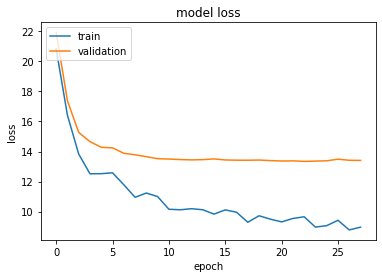

In [260]:
#Let’s see what this looks like when we plot our respective losses:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [263]:
# evaluate the keras model
loss, mae, mse = MLP.evaluate( X_pre, y_pre, verbose=2)
print(" Mean Abs Error: {:5.2f} MPG".format(mse))

22/22 - 0s - loss: 8.3356 - mae: 2.2938 - mse: 7.0800
 Mean Abs Error:  7.08 MPG


#  Model Selection

In machine learning, we usually select our final model after evaluating several candidate models. This process is called model selection. Sometimes the models subject to comparison are fundamentally different in nature (say, decision trees vs. linear models). At other times, we are comparing members of the same class of models that have been trained with different hyperparameter settings.

With MLPs, for example, we may wish to compare models with different numbers of hidden layers, different numbers of hidden units, and various choices of the activation functions applied to each hidden layer. In order to determine the best among our candidate models, we will typically employ a validation dataset.

# Select the best model : retrain on all the data(without cross_val)with the best param 

 This pipline will be used in production 

In [270]:
data_preprocess = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_StandardScaler, num_columns)
)

model_final = Pipeline([('data_cleaning', data_preprocess),
                        ('ridge', ridge
                        )])


# on fit la meilleur pipe sur toute nos données de train
model_final.fit(X, y)

Pipeline(steps=[('data_cleaning',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value='manquante',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pays_corr',
                                                   'Niveau_risque_corr',
                                                   'Emprunteur',
                                                   'Effectifse_corr']),
                                        

In [276]:
# use trained RidgeCV regression model to predict interest rates of training and test data

y_pred = model_final.predict(X_test)
df_model_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# print RMSE of training predictions
print('RMSE on training data: ', np.sqrt(mean_squared_error(y_test, y_pred)))
df_model_final.tail()

RMSE on training data:  2.585471066714785


,Actual,Predicted
637,7.50,5.649141
665,6.25,5.309654
250,0.10,3.402927
513,6.35,5.655560
449,7.20,4.297518


# Sum up :
##  Dataset Size

The other big consideration to bear in mind is the dataset size. Fixing our model, the fewer samples we have in the training dataset, the more likely (and more severely) we are to encounter overfitting. As we increase the amount of training data, the generalization error typically decreases. Moreover, in general, more data never hurt. For a fixed task and data distribution, there is typically a relationship between model complexity and dataset size. Given more data, we might profitably attempt to fit a more complex model. Absent sufficient data, simpler models may be more difficult to beat. For many tasks, deep learning only outperforms linear models when many thousands of training examples are available. 
# Underfitting 

Underfitting is a modeling error which occurs when a function does not fit the data points well enough. It is the result of a simple model with an insufficient number of training points. A model that is under fitted is inaccurate because the trend does not reflect the reality of the data.
Handling Underfitting:

    Get more training data.
    Increase the size or number of parameters in the model.
    Increase the complexity of the model.
    Increasing the training time, until cost function is minimised.

With these techniques, you should be able to improve your models and correct any overfitting or underfitting issues.
# Prefer Confidence Intervals to Point Estimates with use of synthetic samples
**Regression problem to a Classification problem**